In [113]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import mean_absolute_error , r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder , StandardScaler , OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as Date

In [19]:
df=pd.read_csv('/content/car data.csv')

In [20]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
df.shape

(301, 9)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [22]:
Fuel_type=df['Fuel_Type'].unique()
Seller_Type=df['Seller_Type'].unique()
Transmission=df['Transmission'].unique()
print('Fuel_type:',Fuel_type)
print('Seller_Type:',Seller_Type)
print('Transmission:',Transmission)

Fuel_type: ['Petrol' 'Diesel' 'CNG']
Seller_Type: ['Dealer' 'Individual']
Transmission: ['Manual' 'Automatic']


In [23]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


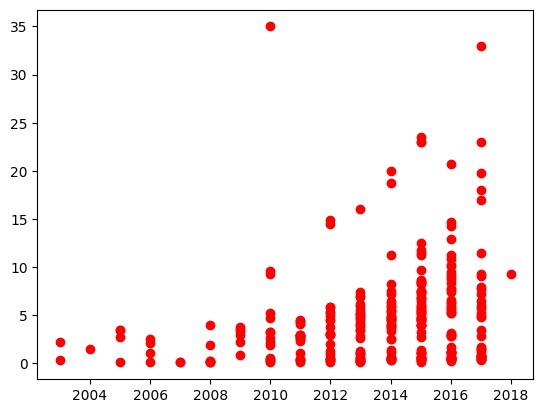

In [24]:
plt.scatter(df['Year'],df['Selling_Price'],c='red')

In [25]:
data_corr=df[['Year','Present_Price','Kms_Driven','Owner','Selling_Price']].corr()

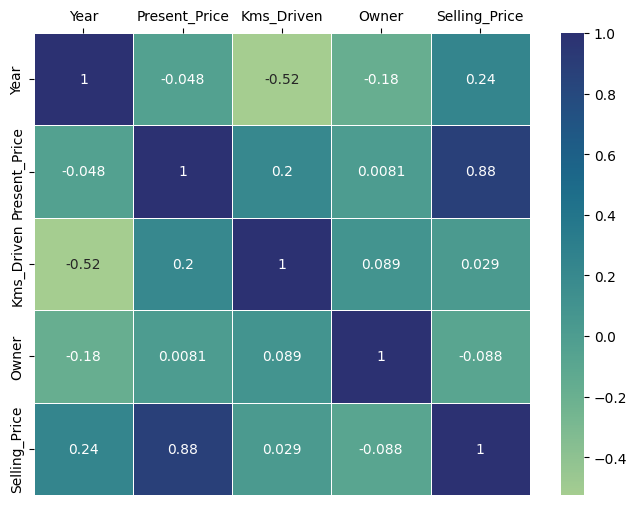

In [26]:
plt.figure(figsize=(8,6))
ax=sns.heatmap(data_corr,cmap='crest',annot=True,linewidths=0.5)
ax.xaxis.tick_top()

**Data Preprocessing**

In [56]:
X=df.drop(columns=['Car_Name','Selling_Price'])
Y=df['Selling_Price']

**📆 Year processing**

*Year = (Current_year - Year)*

In [57]:
current_date=Date.datetime.now()
current_year=current_date.year
current_year ,type(current_year)
X['Year']=X['Year'].apply(lambda year :current_year - year)

**Processing Fuel_Type**

(Petrol , Diesel , CNG)

In [58]:
fuel_type_one_hot_encoder = OneHotEncoder(categories=[Fuel_type])

In [59]:
fuel_type_one_hot_encoding=fuel_type_one_hot_encoder.fit_transform(X[['Fuel_Type']])

In [60]:
X[Fuel_type]=fuel_type_one_hot_encoding.astype(int).toarray()
X=X.drop(columns=['Fuel_Type'])

**processing Transmission**

Manual = 0

Automatic = 1

In [61]:
ordinal_encoder=OrdinalEncoder(categories=[['Manual','Automatic']])

In [62]:
transmission_ordinal_encoding=ordinal_encoder.fit_transform(X[['Transmission']])

In [63]:
X['Transmission']=transmission_ordinal_encoding.astype(int)

**processing Seller_Type**

(Dealer , Individual)

In [64]:
Seller_Type_one_hot_encoder=OneHotEncoder(categories=[['Individual','Dealer']])

In [65]:
Seller_Type_one_hot_encoding=Seller_Type_one_hot_encoder.fit_transform(X[['Seller_Type']])

In [66]:
X[['Individual','Dealer']]=Seller_Type_one_hot_encoding.astype(int).toarray()
X=X.drop(columns=['Seller_Type'])

In [67]:
X.head()

,Year,Present_Price,Kms_Driven,Transmission,Owner,Petrol,Diesel,CNG,Individual,Dealer
0,10,5.59,27000,0,0,1,0,0,0,1
1,11,9.54,43000,0,0,0,1,0,0,1
2,7,9.85,6900,0,0,1,0,0,0,1
3,13,4.15,5200,0,0,1,0,0,0,1
4,10,6.87,42450,0,0,0,1,0,0,1


**Model Training**

In [68]:
X_train , X_test , Y_train , Y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [120]:
model_regression = LinearRegression()

In [121]:
model_regression.fit(X_train,Y_train)

LinearRegression()

In [122]:
X_train_predictations= model_regression.predict(X_train)

In [123]:
X_train_accuracy=mean_absolute_error(Y_train,X_train_predictations)
X_train_percentage_accuracy=r2_score(Y_train,X_train_predictations)

In [124]:
print(f'X_train_accuracy :{X_train_accuracy }')
print(f'X_train_percentage_accuracy :{X_train_percentage_accuracy}%')

X_train_accuracy :1.1675804448350366
X_train_percentage_accuracy :0.8886517300804564%


In [125]:
X_test_predictations= model_regression.predict(X_test)

In [126]:
X_train_accuracy=mean_absolute_error(Y_test,X_test_predictations)
X_train_percentage_accuracy=r2_score(Y_test,X_test_predictations)

In [127]:
print(f'X_train_accuracy :{X_train_accuracy}')
print(f'X_train_percentage_accuracy :{X_train_percentage_accuracy}%')

X_train_accuracy :1.2162256821296333
X_train_percentage_accuracy :0.8489813024898876%
